In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

from cmdstanpy import CmdStanModel


### Task 1

In [3]:
N = 50 # cases count
thetaIn = 0.2 # typical allergy probability

In [4]:
model1 = CmdStanModel(stan_file='model1.stan')

samples1 = model1.sample(
    fixed_param=True,
    iter_sampling=1000,
    iter_warmup=0,
    chains = 1
).draws_pd()

# add verification of p
samples1["p_baseline"] = samples1["y"] / N # as per the task, no input data, just fixed paramters in STAN code

samples1

INFO:cmdstanpy:compiling stan file /root/DA2023/lab3/model1.stan to exe file /root/DA2023/lab3/model1
INFO:cmdstanpy:compiled model executable: /root/DA2023/lab3/model1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,N,thetaIn,y,p,p_baseline
0,0.0,0.0,50.0,0.2,5.0,0.197401,0.10
1,0.0,0.0,50.0,0.2,8.0,0.230612,0.16
2,0.0,0.0,50.0,0.2,11.0,0.176617,0.22
3,0.0,0.0,50.0,0.2,8.0,0.190800,0.16
4,0.0,0.0,50.0,0.2,6.0,0.166304,0.12
...,...,...,...,...,...,...,...
995,0.0,0.0,50.0,0.2,13.0,0.206079,0.26
996,0.0,0.0,50.0,0.2,5.0,0.212910,0.10
997,0.0,0.0,50.0,0.2,12.0,0.217180,0.24
998,0.0,0.0,50.0,0.2,13.0,0.199408,0.26


<AxesSubplot:xlabel='p', ylabel='Density'>

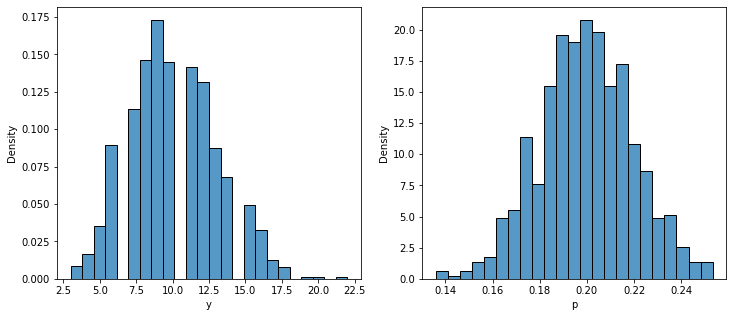

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
axes = axes.ravel()

[ax0, ax1] = axes

sns.histplot(data=samples1, x="y", stat="density", ax=ax0)
sns.histplot(data=samples1, x="p", stat="density", ax=ax1)

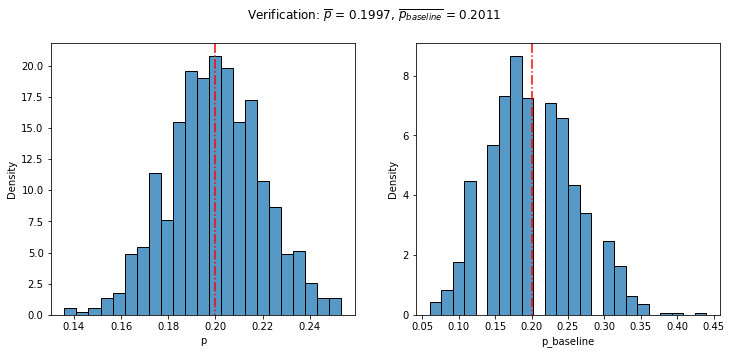

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
axes = axes.ravel()

[ax0, ax1] = axes

avgP = samples1["p"].mean()
avgPBaseline = samples1["p_baseline"].mean()

sns.histplot(data=samples1, x="p", stat="density", ax=ax0)
ax0.axvline(avgP, ymin=-1, ymax=21, color="r", linestyle="-.")

sns.histplot(data=samples1, x="p_baseline", stat="density", ax=ax1)
ax1.axvline(avgPBaseline, ymin=-1, ymax=10, color="r", linestyle="-.")

_ = plt.suptitle(f"Verification: $\\overline{{p}}$ = ${avgP :.4f}$, $\\overline{{p_{{baseline}}}}$ = ${avgPBaseline :.4f}$")

Ad task 1: it is clearly visible that the computed ratio of allergic reactions for each sample matches the verification baseline (difference at the fourth floating position).

### Task 2

In [17]:
model2 = CmdStanModel(stan_file='model2.stan')

samples2 = model2.sample(
    data={ "N": N, "thetaIn": thetaIn, "y": 2 },
    fixed_param=True,
    iter_sampling=1000,
    iter_warmup=0,
    chains = 1
).draws_pd()

samples2["y_pred"] = samples2["y_pred"] / N

samples2

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,p,y_pred
0,0.0,0.0,0.191464,0.22
1,0.0,0.0,0.191464,0.20
2,0.0,0.0,0.191464,0.24
3,0.0,0.0,0.191464,0.12
4,0.0,0.0,0.191464,0.22
...,...,...,...,...
995,0.0,0.0,0.191464,0.18
996,0.0,0.0,0.191464,0.22
997,0.0,0.0,0.191464,0.22
998,0.0,0.0,0.191464,0.12


Text(0, 0.5, 'Occurences')

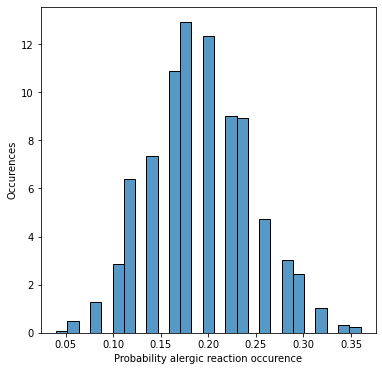

In [29]:
fig = plt.figure(figsize=(6, 6))

sns.histplot(data=samples2, x="y_pred", stat="density", ax=fig.gca())

plt.xlabel("Probability of alergic reaction occurence")
plt.ylabel("Occurences")

In [35]:
predHDI, pHDI = [az.hdi(samples2[key].to_numpy(), credible_interval=0.94) for key in ["y_pred", "p"]]

print(f"Expected prediction value: {samples2['y_pred'].mean() :.3f}")
print(f"94%-density prediction HDI: <{predHDI[0] :.4f} ~ {predHDI[1] :.4f}>")

print()
print(f"Expected p: {samples2['p'].mean() :.4f}")
print(f"94%-density p HDI: <{pHDI[0] :.4f} ~ {pHDI[1] :.4f}>")

print()
print(f"The predicted ratio < average probability value with a probability of {np.sum(samples2['y_pred'] < 0.2) / len(samples2['y_pred']) * 100 :.4f}%")

Expected prediction value: 0.192
94%-density prediction HDI: <0.1000 ~ 0.3000>

Expected p: 0.1915
94%-density p HDI: <0.1915 ~ 0.1915>

The predicted ratio < average probability value with a probability of 50.1000%
